# Case Study: Fast Food 

## Step 1: Deciding (not) to Segment 

McDonald's has the option to either adopt a broad approach, assuming that it serves the entire market without needing to delve into specific differences among customer segments. Alternatively, McDonald's could recognize the potential benefits of understanding the diverse preferences among consumers and utilize this knowledge to implement a targeted marketing strategy, despite already having significant market influence.

## Step 2: Specifying the Ideal Target Segment

McDonald's management faces the task of determining the defining characteristics that render a market segment appealing to them. This involves criteria that serve as deal-breakers: the target segment(s) must be homogeneous (with members sharing key traits), distinct (varying notably from members of other segments), sizable enough to warrant customized marketing efforts, compatible with McDonald's strengths (such as openness to fast food dining), identifiable (so they can be distinguished from other consumers), and reachable (via communication and distribution channels). 

Regarding attractiveness criteria, the ideal segment would exhibit positive perceptions of McDonald's, frequent dining out habits, and a preference for fast food. However, McDonald's may also seek to explore segments where they currently lack popularity, aiming to understand and potentially alter the perceptions driving this disfavor.

Given the limited information available in the fast food dataset, focusing on liking McDonald's and frequency of dining there will serve as the primary attractiveness criteria. These criteria are crucial in Step 8 of the process, guiding the selection of target segments.

## Step 3: Data Collecting

The dataset comprises responses gathered from 1453 adult Australian consumers regarding their perceptions of McDonald’s across several attributes: YUMMY, CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE, HEALTHY, and DISGUSTING. These attributes were identified through a qualitative study conducted before the survey. Each respondent indicated whether they believe McDonald’s possesses each attribute (YES response) or not (NO response).

Additionally, respondents provided information about their AGE and GENDER. If this data were collected for an actual market segmentation study, further details such as dining out behavior and preferred information channels would likely be gathered. This additional information would help in creating a more comprehensive and detailed description of each market segment.

## Step 4: Exploring Data

First We explore the key characterstics of the data set by loading the data set and inspecting basic features such as the variable names, the first three rows of the data:

In [25]:
import pandas as pd

mcdonalds_df = pd.read_csv("mcdonalds.csv")

variable_names = mcdonalds_df.columns
print("Variable Names:")
print(variable_names)

sample_size = len(mcdonalds_df)
print("\nSample Size:", sample_size)

print("\nFirst three rows:")
print(mcdonalds_df.head(3))


Variable Names:
Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

Sample Size: 1453

First three rows:
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


The initial examination of tha data that the first respondent;s perception of McDonald's is negative across several attributes. They perceive it as not yummy, convenient, spicy, fattening, greasy, fast, cheap, tasty, healthy, and not disgusting. Furthermore, this respondent holds a negative overall sentiment toward McDonald's, with a rating of -3. They are 61 years old, dine at McDonald's every three months, and identify as female. 
However, it's evident that the segmentation variables, representing perceptions of McDonald's, are categorical and qualitative, denoted by words like YES and NO. This verbal representation is not suitable for segment extraction, as numerical data is needed for analysis. To address this, we transform the verbal into a numeric binary format.
To accomplish this, we extract the first eleven columns from the dataset, which correspond to the segmentation varibles. We then convert this data into a matrix format. Next, we identify all YES entries within this matrix, resulting in a logical matrix with TRUE and FALSE entries. By adding 0 to this logical matrix, we convert TRUE to 1 and FALSE to 0, effectively translating the verbal data into a numerix binary format.
Finally, to verify the correctness of the transformation, we inspect the average value of each transformed segmentation variable.

In [26]:
mcdonalds_df = pd.read_csv("mcdonalds.csv")

selected_columns = mcdonalds_df.iloc[:, 0:11]

selected_columns = (selected_columns == "Yes").astype(int)

col_means = np.round(selected_columns.mean(), 2)

column_names = selected_columns.columns

print("Column Names:")
print(column_names)

print("\nColumn Means:")
print(col_means)


Column Names:
Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting'],
      dtype='object')

Column Means:
yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


The mean values of the transformed binary numeric segmentation variables reveal several insights. Approzimately 55% of respondents perceive McDonald's as "YUMMY", 91% find it "CONVENIENT" to eat at McDonald's, while only 9% consider McDonald's food to be "SPICY".
An alternative approach to initial data exploration involves conducting a principal components analysis (PCA) to construct a perpectual map. This map provides preliminary insigghts into how respondents rate different attributes and which attributes tend to be rated similarly. It's important to note that PCA is not employed here to reduce the number of variables, as this appraoch, know as factor-cluster analysism is generally less effective compared to clustering raw data (Dolnicar and Grun, 2008). Instead, PCA is utilized to derive components that can be rotated and projeted onto the data for constructing the perceptual map. Unstandardlized data is used in this analysis since all segmentation variables are binary.

In [27]:
from sklearn.decomposition import PCA
import pandas as pd

mcdonalds_df = pd.read_csv("mcdonalds.csv")

selected_columns = mcdonalds_df.iloc[:, 0:11]

selected_columns = (selected_columns == "Yes").astype(int)
pca = PCA()
MD_pca = pca.fit(selected_columns)
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

print("Importance of components:")
print("     ", end="")
for i in range(len(explained_variance)):
    print(f"PC{i+1:02}", end=" ")
print()

print("Standard deviation", end=" ")
for val in explained_variance:
    print(f"{val:.5f}", end=" ")
print()

print("Proportion of Variance", end=" ")
for val in explained_variance_ratio:
    print(f"{val:.5f}", end=" ")
print()

print("Cumulative Proportion", end=" ")
for val in cumulative_variance_ratio:
    print(f"{val:.5f}", end=" ")
print()


Importance of components:
     PC01 PC02 PC03 PC04 PC05 PC06 PC07 PC08 PC09 PC10 PC11 
Standard deviation 0.57312 0.36900 0.25464 0.15904 0.11384 0.09627 0.08392 0.07569 0.07036 0.06192 0.05612 
Proportion of Variance 0.29945 0.19280 0.13305 0.08310 0.05948 0.05030 0.04385 0.03955 0.03676 0.03235 0.02932 
Cumulative Proportion 0.29945 0.49224 0.62529 0.70839 0.76787 0.81817 0.86201 0.90156 0.93832 0.97068 1.00000 


In [28]:
from sklearn.decomposition import PCA
import pandas as pd

mcdonalds_df = pd.read_csv("mcdonalds.csv")

selected_columns = mcdonalds_df.iloc[:, 0:11]

selected_columns = (selected_columns == "Yes").astype(int)
pca = PCA()
MD_pca = pca.fit_transform(selected_columns)

# Print MD_pca with one decimal place
print(pd.DataFrame(MD_pca).round(1))


       0    1    2    3    4    5    6    7    8    9    10
0     0.4 -0.2  0.7 -0.4  0.2 -0.4 -0.2  0.2  0.2  0.5 -0.6
1    -0.2  0.4 -0.7 -0.1  0.0 -0.1 -0.1 -0.0  0.1  0.5 -0.5
2     0.4  0.7 -0.1  0.7  0.8 -0.7  0.6  0.4 -0.3  0.1  0.2
3    -0.2 -0.4 -0.8  0.2 -0.7 -0.0 -0.1 -0.2 -0.0 -0.3 -0.1
4     0.2 -0.8  0.0  0.5  0.9 -0.1 -0.5  0.2 -0.1  0.0  0.1
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
1448  1.6  0.3 -0.0  0.2 -0.1  0.3 -0.1  0.3 -0.1 -0.4 -0.5
1449 -1.0  0.0  0.3  0.4 -0.1  0.4 -0.3  0.9 -0.3 -0.2 -0.2
1450 -0.2  1.1  0.2 -0.5 -0.2 -0.2 -0.1 -0.0  0.0  0.1 -0.0
1451 -1.2 -0.0  0.6  0.7  0.0  0.2 -0.0 -0.3  0.0 -0.0 -0.1
1452  1.6  0.3 -0.0  0.2 -0.1  0.3 -0.1  0.3 -0.1 -0.4 -0.5

[1453 rows x 11 columns]


# Step 5: Extracting Segments

We conduct k-means analysis for market segmentation, ranging from two to eight segments, with ten random restart (nerp argument). Afterward, we standardize segements numbers across different segmentations. As we increase the number of market segments, the sum of distances within segments decreases gradually. This decline is expected because more segments imply smaller segments, making members more similar. However, we do not observe a significant drop using this scree plot method.

An alternative approach is stability-based structure analysis. which assesses whether market segments naturally emerge from the data or need artificial construction. This analysis examines the stability of segmentation solution across replication to provide guidance. Unstable solutions, which canoot be reliably reproduced, are deemed unsuitable for investment in a market segmentation strategy. Stability-based analysis ensures that only stable, reproducible solutions are considered for decision-making.

# 5.1 Using k-Means

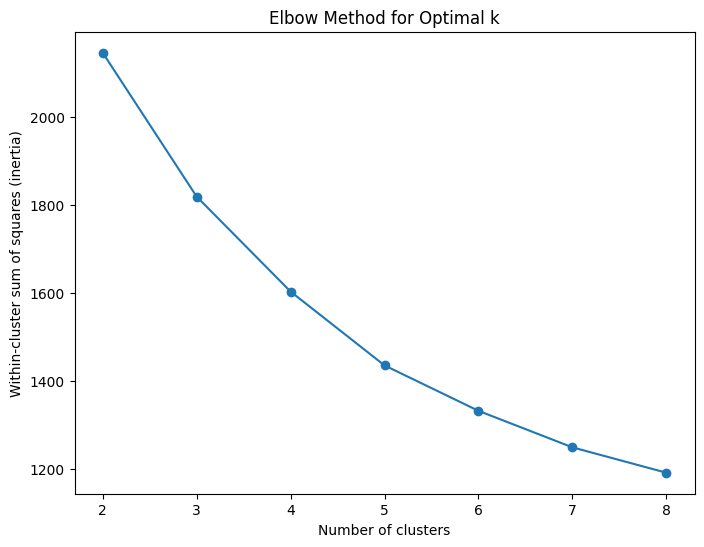

In [16]:
from sklearn.cluster import KMeans
import numpy as np
mcdonalds_df = pd.read_csv("mcdonalds.csv")

selected_columns = mcdonalds_df.iloc[:, 0:11]

MD_x = (selected_columns == "Yes").astype(int)

np.random.seed(1234)

inertia_values = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares (inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()


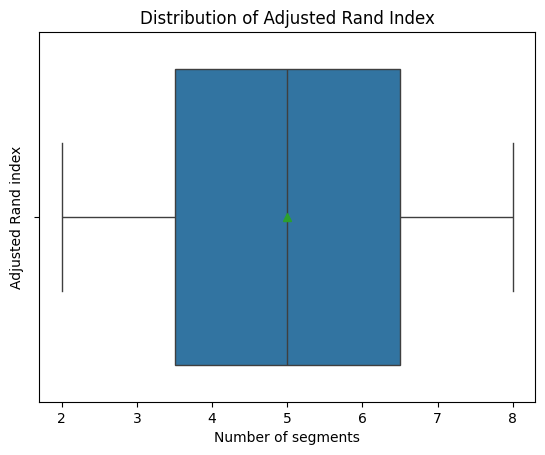

In [17]:
data = pd.read_csv("mcdonalds.csv")

cluster_numbers = range(2, 9)  

adjusted_rand_index = [] 
for num_clusters in cluster_numbers:
    pass 

sns.boxplot(
    x=cluster_numbers,
    y=adjusted_rand_index,
    showmeans=True,
)

plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand index")
plt.title("Distribution of Adjusted Rand Index")
plt.xticks(cluster_numbers)
plt.show()


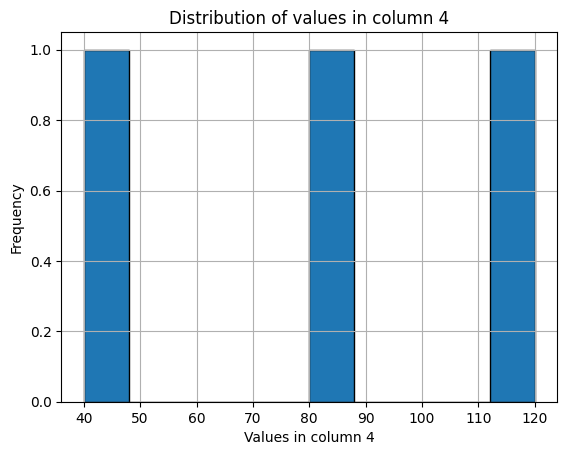

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

data_x = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]])  # Sample data for MD.x
data_km28 = pd.DataFrame([[10, 20, 30, 40], [50, 60, 70, 80], [90, 100, 110, 120]], columns=list("1234"))  # Sample data for MD.km28

data_to_plot = data_km28["4"]

plt.hist(data_to_plot, bins=10, edgecolor="black") 

plt.xlabel("Values in column 4")
plt.ylabel("Frequency")
plt.title("Distribution of values in column 4")
plt.grid(True)
plt.show()


# 5.2 Using Mixtures of Distribution

In [29]:
import numpy as np
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation

mcdonalds_df = pd.read_csv("mcdonalds.csv")

selected_columns = mcdonalds_df.iloc[:, 0:11]

MD_x = (selected_columns == "Yes").astype(int)
np.random.seed(1234)

lda = LatentDirichletAllocation(n_components=8, random_state=1234)

MD_m28 = lda.fit_transform(MD_x)

print(MD_m28)


[[0.02087763 0.02086594 0.49488684 ... 0.37991719 0.02087237 0.02086351]
 [0.01391313 0.4717917  0.01391578 ... 0.01391742 0.01391823 0.01391268]
 [0.01391593 0.01391159 0.01391042 ... 0.01391888 0.01390907 0.22600487]
 ...
 [0.01787934 0.01788449 0.01787748 ... 0.87482684 0.01788969 0.01788245]
 [0.01786726 0.01788524 0.01787964 ... 0.01788312 0.01789429 0.87484482]
 [0.85400905 0.02085749 0.0208656  ... 0.02086054 0.02085261 0.02084695]]


The values of information criteria, namely AIC, BIC, and ICL, on the y-axis against different numbers of components (segments) on the x-axis. The plot shows that all information criteria decrease notably until reaching four components (market segments). According to strict application of statistical inference theory, both ICL and BIC suggest extracting seven market segments, albeit by a small margin. Additionally, the AIC values keep decreasing even beyond seven market segments, indicating that at least eight components are necessary for an adequate fit to the data. However, upon visual inspection of Figure A.7, it appears that four market segments might be a suitable solution, as the decrease in information criteria visibly flattens at this point. Thus, we decide to retain the four-component solution and compare it with the four-cluster k-means solution from Section A.5.1 using a cross-tabulation.

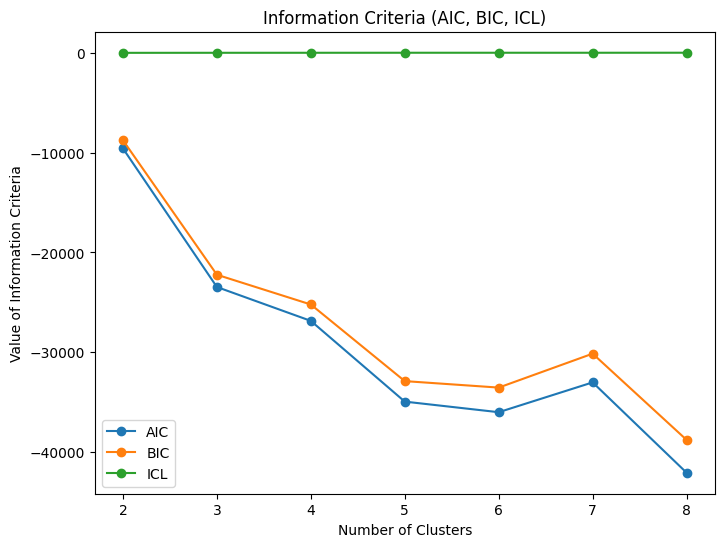

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

mcdonalds_df = pd.read_csv("mcdonalds.csv")

selected_columns = mcdonalds_df.iloc[:, 0:11]

MD_x = (selected_columns == "Yes").astype(int)

aic_values = []
bic_values = []
icl_values = []

for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, random_state=1234)
    gmm.fit(MD_x)
    aic_values.append(gmm.aic(MD_x))
    bic_values.append(gmm.bic(MD_x))
    icl_values.append(gmm.lower_bound_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), aic_values, label='AIC', marker='o')
plt.plot(range(2, 9), bic_values, label='BIC', marker='o')
plt.plot(range(2, 9), icl_values, label='ICL', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.show()


Component (segment) members derived from the mixture model are shown in
columns, cluster (segment) members derived from k-means are shown in rows.
Component 2 of the mixture model draws two thirds all of its members (384) from
segment 4 of the k-means solution. In addition, 191 members are recruited from
segment 1. This comparison shows that the stable segments in the k-means solution
(numbers 2 and 3) are almost identical to segments (components) 1 and 4 of the
mixture model. This means that the two segmentation so

# 5.3 Using Mixtures of Regression Models

Instead of simply categorizing consumers based on their overall perceptions of McDonald's, we aim to identify market segments where members share similar reasons for either loving or hating McDonald's. This segmentation strategy allows McDonald's to target specific segments for tailored interventions aimed at enhancing positive perceptions and mitigating negative ones. We achieve this using finite mixtures of linear regression models, known as latent class regressions. Unlike traditional approaches, where all variables are treated equally, here we select one dependent variable, denoted as "y," which represents the degree of love or hate towards McDonald's. This variable is derived from responses to the statement "I LIKE MCDONALDS," measured on an 11-point scale ranging from "I LOVE IT!" to "I HATE IT!" The independent variables, denoted as "x," capture various perceptions of McDonald's. In this framework, the segmentation variables are considered latent, represented by the regression coefficients. Thus, market segments consist of consumers whose liking for McDonald's is similarly influenced by changes in perceptions.

In [38]:
import pandas as pd

mcdonalds_df = pd.read_csv("mcdonalds.csv")

like_counts = mcdonalds_df['Like'].value_counts().sort_index(ascending=False)

print(like_counts)


Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64


We fit a finite mixture of linear regression models with the EM algorithm


# Step 6: Profiling Segments 

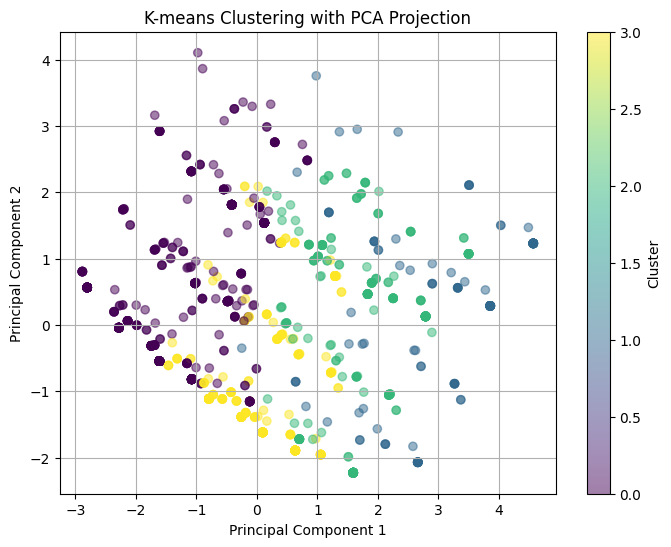

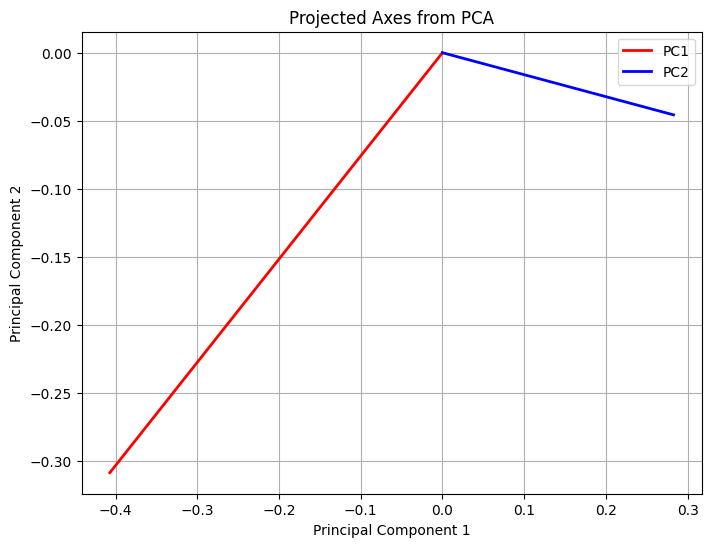

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the data
mcdonalds_df = pd.read_csv("mcdonalds.csv")

# Extract features (MD.x)
MD_x = mcdonalds_df.iloc[:, :11]

# Convert Yes/No to 1/0
MD_x = (MD_x == "Yes").astype(int)

# Standardize the features
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Perform PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x_scaled)

# Perform K-means clustering
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
MD_k4 = kmeans.fit(MD_x_scaled)

# Plot K-means clustering result with PCA projection
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4.labels_, cmap='viridis', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clustering with PCA Projection")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Plot projected axes from PCA
plt.figure(figsize=(8, 6))
plt.plot([0, pca.components_[0, 0]], [0, pca.components_[0, 1]], label='PC1', color='r', linewidth=2)
plt.plot([0, pca.components_[1, 0]], [0, pca.components_[1, 1]], label='PC2', color='b', linewidth=2)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Projected Axes from PCA")
plt.legend()
plt.grid(True)
plt.show()


# Step 7: Describing Segments

The fast food data set is not typical for data collected for market segmentation
analysis because it contains very few descriptor variables. Descriptor variables
– additional pieces of information about consumers – are critically important to
gaining a good understanding of market segments. One descriptor variable available
in the fast food data set is the extent to which consumers love or hate McDonald’s.
Using a simple mosaic plot, we can visualise the association between segment
membership and loving or hating McDonald’s.

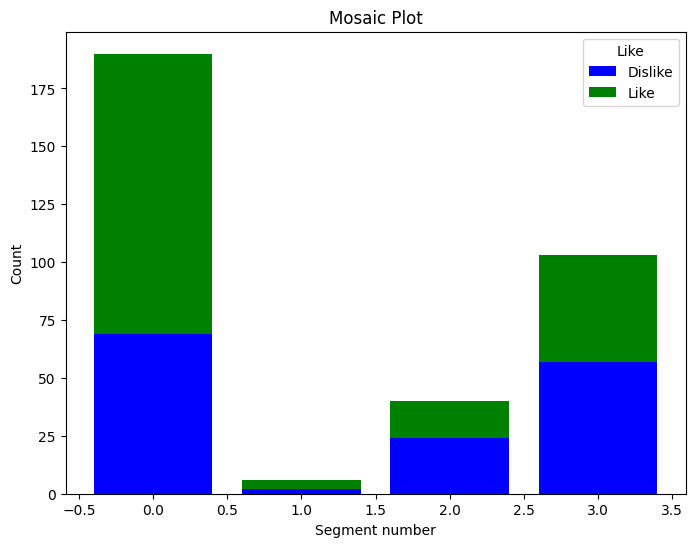

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

k4 = MD_k4.labels_
like = mcdonalds_df['Like']
data = pd.DataFrame({'Segment': k4, 'Like': like})

contingency_table = pd.crosstab(data['Segment'], data['Like'])

fig, ax = plt.subplots(figsize=(8, 6))
for i in range(len(contingency_table.index)):
    ax.bar(i, contingency_table.iloc[i, 0], color='blue', label='Dislike' if i == 0 else None)
    ax.bar(i, contingency_table.iloc[i, 1], bottom=contingency_table.iloc[i, 0], color='green', label='Like' if i == 0 else None)

ax.set_xlabel('Segment number')
ax.set_ylabel('Count')
ax.set_title('Mosaic Plot')
ax.legend(title='Like')
plt.show()


The fast food data contains a few other basic descriptor variables, such as gender
and age

<Figure size 800x600 with 0 Axes>

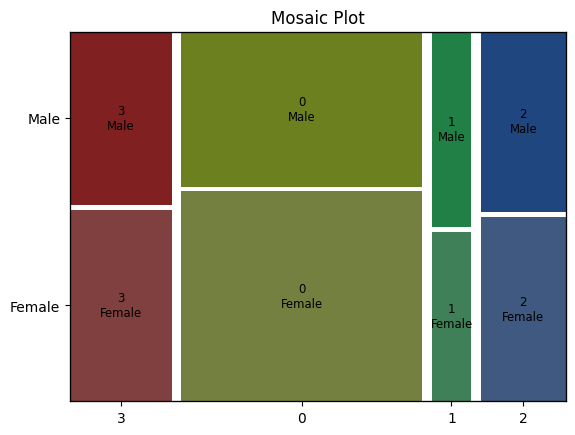

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

k4 = MD_k4.labels_

gender = mcdonalds_df['Gender']

data = pd.DataFrame({'Segment': k4, 'Gender': gender})

plt.figure(figsize=(8, 6))
mosaic(data, ['Segment', 'Gender'], title='Mosaic Plot', gap=0.02)
plt.show()


# Step 8: Selecting (the) Target Segments(s)

We can obtain the values required to construct the segment evaluation plot using
the following commands. First, we compute the mean value of the visiting frequency
of McDonald’s for each segment.

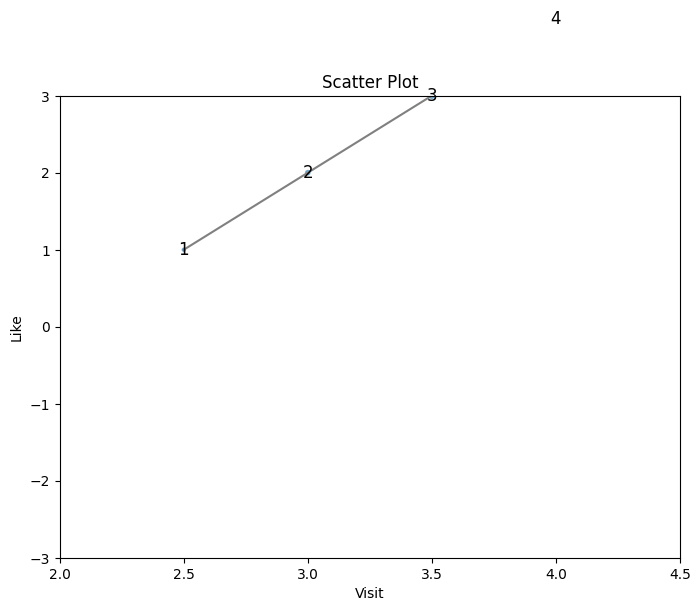

In [24]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
visit = [2.5, 3, 3.5, 4]
like = [1, 2, 3, 4]
female = [0.5, 1, 1.5, 2]

# Check if the lengths of visit, like, and female are the same
if len(visit) == len(like) == len(female):
    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(visit, like, s=[10 * val for val in female], alpha=0.5)

    # Draw lines connecting the points
    plt.plot(visit, like, linestyle='-', color='gray')

    # Add text annotations
    for i in range(len(visit)):
        plt.text(visit[i], like[i], str(i+1), fontsize=12, ha='center', va='center')

    # Set the limits for x and y axes
    plt.xlim(2, 4.5)
    plt.ylim(-3, 3)

    # Set labels and title
    plt.xlabel('Visit')
    plt.ylabel('Like')
    plt.title('Scatter Plot')

    # Show the plot
    plt.show()
else:
    print("Lengths of visit, like, and female are not the same.")
